In [3]:
from __future__ import division

import glob
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

% matplotlib inline

In [4]:
plt.style.use('ggplot')

In [5]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['axes.edgecolor']='k'
mpl.rcParams['axes.linewidth']=3
mpl.rcParams['font.size']=12
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.color'] = 'k'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 3.6
mpl.rcParams['ytick.major.size'] = 3.6
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

In [6]:
def makeCmap(hexColour,name,zeroColour='#FFFFFF'):
    r0,g0,b0=mpl.colors.hex2color(zeroColour)
    r,g,b=mpl.colors.hex2color(hexColour)
    cdict = {'red':   ((0.0, r0, r0),
                   (1.0, r, r)),
         'green': ((0.0, g0, g0),
                   (1.0, g, g)),
         'blue':  ((0.0, b0, b0),
                   (1.0, b, b))
        }
    cmap = mpl.colors.LinearSegmentedColormap(name,cdict)
    return cmap

In [33]:
def plotBackground(thisPlot,x0,y0,colour,zorder0):
    cmap=makeCmap('#011627','name')
    yMin=y0*np.power(x0/1e20,2)
    yMax=y0*np.power(x0/1e-20,2)
    nColours=25
    change=0.01
    for i in range(nColours-1):
        thisPlot.fill([1e-23,1e-20,1e20],[yMax*change**(i),yMin*change**(i),yMin*change**(i)],c=cmap((i+1)/nColours),zorder=(i+1)+zorder0)
    
    newZord = i+1+zorder0
    return thisPlot, newZord

data/asteroids.txt
data/galaxiesGas.txt
data/planetsTransitBins_GK.txt
data/bd-numberdensities.txt
data/interstellar-asteroid.txt
data/planetsRVbins_GK.txt
data/mcloudsMWdendr.txt
data/planetsTransitBins_M.txt
data/planetsTransitBins_GK_univ.txt
data/planetsRVpowerLaw_univ.txt
data/planetsRVpowerLaw.txt
data/mcloudsMWgauss.txt
data/planetsRVbins_M.txt
data/planetsTransitBins_M_univ.txt
data/SMBHs.txt
data/galaxiesStars.txt
data/oort-cloud_universe.txt
data/planetsMicrolensing.txt
data/empiricalGal.txt
data/galaxiesDM.txt
data/planetsMicrolensing_univ.txt
data/chabrierImf.txt
data/galaxiesBHs.txt
data/planetsRVbins_GK_univ.txt
data/KBOs.txt
data/companion-BDs.txt
data/planetsRVbins_M_univ.txt


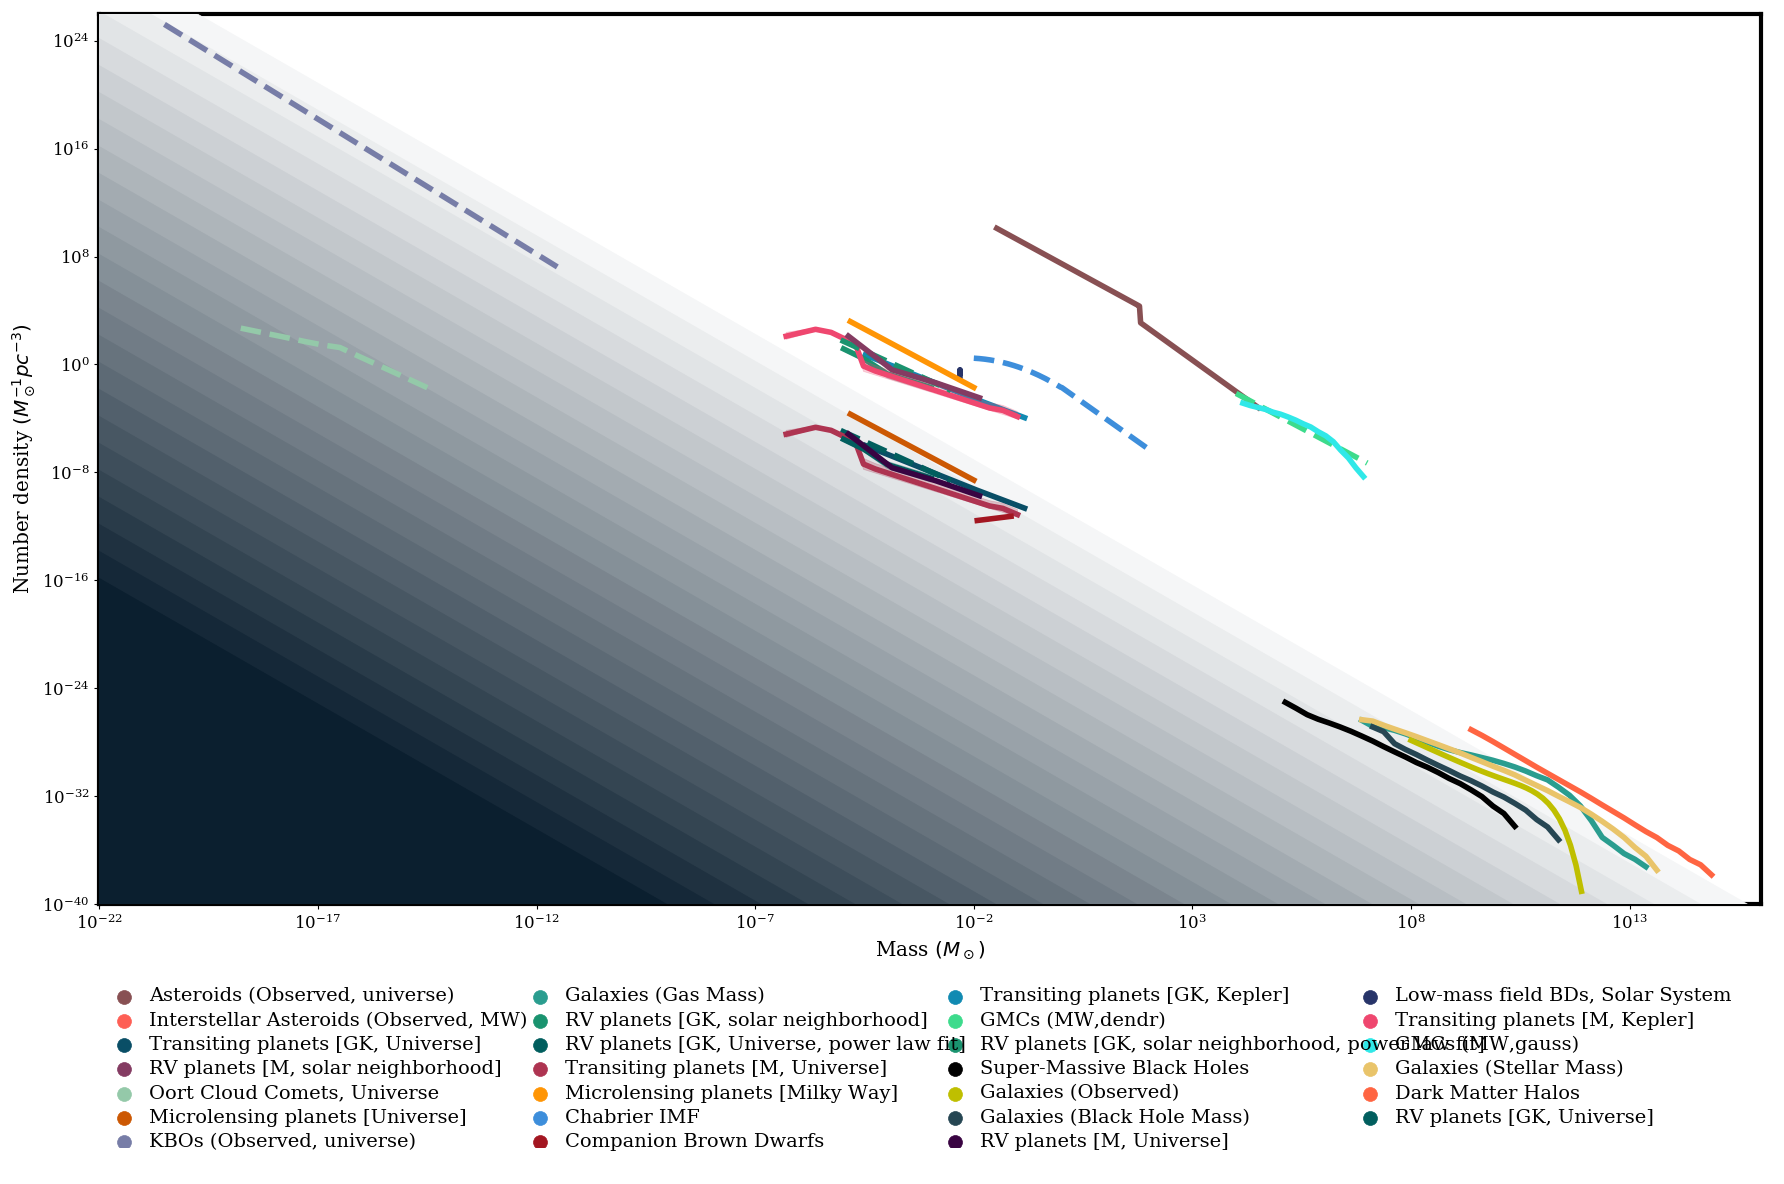

In [34]:
zord = 2

fig = plt.figure(figsize=(18,12))
nGrid = mpl.gridspec.GridSpec(5,1)
nPlot = plt.subplot(nGrid[0:4,0])
sPlot = plt.subplot(nGrid[4,0])

nPlot.set_xscale('log')
nPlot.set_yscale('log')
nPlot.set_ylim(1e-40,1e26)
nPlot.set_xlim(1e-22,1e16)
nPlot.set_xlabel(r'Mass $(M_\odot)$')
nPlot.set_ylabel(r'Number density $(M_\odot^{-1} pc^{-3})$')
nPlot.grid("off")

sPlot.axis('off')
sPlot.set_xlim(0,1)
sPlot.set_ylim(0,1)

nPlot, zord = plotBackground(nPlot,1e16,1e-40,'k',zorder0=zord)
nFile=0
for fileName in glob.glob('data/*.txt'):
    print(fileName)
    with open(fileName, 'r') as f:
        footer = f.readlines()[-1]
        #print(re.split(r'/+', footer))
    _,name,colour,linestyle,_=re.split(r'/+', footer)
    data=np.atleast_2d(np.genfromtxt(fileName))
    data=data[data[:,1]>0,:]
    nPlot.plot(data[:,0],data[:,1],zorder=zord,c=colour,ls=linestyle)
    zord+=1
    #nPlot.text(textPos[index][0],textPos[index][1],text[index],color=colours[index])
    if np.shape(data)[1] > 2: #if uncertainty columns are included
        xs = np.concatenate((data[:,0],data[:,0][::-1]))
        ys = np.concatenate(((data[:,1]+data[:,2]),(data[:,1]-data[:,3])[::-1]))
        nPlot.fill(xs, ys, alpha=0.25,zorder=zord,c=colour)
        zord+=1
    
    xText=0.03+0.25*(nFile % 4)
    yText=0.9-0.15*int(nFile/4)
    sPlot.scatter(xText-0.015,yText+0.03,s=100,c=colour)
    sPlot.text(xText,yText,name,fontsize=14)
    nFile+=1

plt.tight_layout()
plt.savefig('plot.pdf')
plt.show()

In [7]:
# one annoying thing about the above plot is that it doesn't seem to be possible to drawn the axes on top of the shaded triangles...

# another thing to do: Once various planet lines are on there, see if they add up to the total predicted by the planet simulation paper